In [1]:
import pandas as pd

In [41]:
def parse_csv(file_path):
    df = pd.read_csv(
        file_path,
        index_col="datetime_beginning_ept",
    ).drop(columns=["datetime_beginning_utc"])
    df.index = pd.DatetimeIndex(df.index)
    return df.groupby(pd.Grouper(freq="MS")).sum()["mw"]

In [42]:
parse_csv("data/electricity_monthly/hrl_load_metered_2020.csv")

datetime_beginning_ept
2020-01-01    1.364436e+08
2020-02-01    1.258108e+08
2020-03-01    1.187803e+08
2020-04-01    1.035772e+08
2020-05-01    1.088860e+08
2020-06-01    1.297593e+08
2020-07-01    1.605900e+08
2020-08-01    1.476292e+08
2020-09-01    1.195400e+08
2020-10-01    1.121418e+08
2020-11-01    1.141442e+08
2020-12-01    1.372661e+08
Freq: MS, Name: mw, dtype: float64

In [43]:
parse_csv("data/electricity_monthly/hrl_load_metered_2021.csv")

datetime_beginning_ept
2021-01-01    1.414898e+08
2021-02-01    1.323127e+08
2021-03-01    1.223418e+08
2021-04-01    1.100001e+08
2021-05-01    1.170729e+08
2021-06-01    1.382923e+08
2021-07-01    1.517932e+08
2021-08-01    1.558384e+08
2021-09-01    1.270068e+08
2021-10-01    1.171327e+08
2021-11-01    1.222128e+08
2021-12-01    1.298743e+08
Freq: MS, Name: mw, dtype: float64

In [47]:
df = pd.concat(
    [
        parse_csv(f"data/electricity_monthly/hrl_load_metered_{year}.csv")
        for year in range(2020, 2025)
    ]
)

<Axes: xlabel='datetime_beginning_ept'>

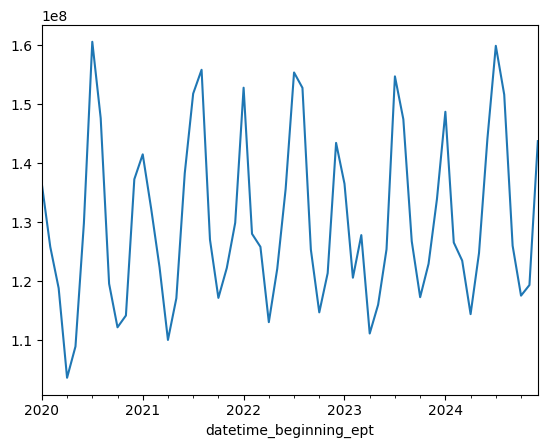

In [48]:
df.plot()

In [54]:
df.to_numpy()

array([1.36443618e+08, 1.25810781e+08, 1.18780322e+08, 1.03577238e+08,
       1.08885996e+08, 1.29759317e+08, 1.60589971e+08, 1.47629207e+08,
       1.19540029e+08, 1.12141843e+08, 1.14144180e+08, 1.37266079e+08,
       1.41489813e+08, 1.32312727e+08, 1.22341812e+08, 1.10000121e+08,
       1.17072935e+08, 1.38292265e+08, 1.51793170e+08, 1.55838362e+08,
       1.27006789e+08, 1.17132729e+08, 1.22212781e+08, 1.29874283e+08,
       1.52798022e+08, 1.28004300e+08, 1.25798915e+08, 1.13016539e+08,
       1.22065764e+08, 1.35619452e+08, 1.55381596e+08, 1.52772073e+08,
       1.25332440e+08, 1.14674014e+08, 1.21335024e+08, 1.43433098e+08,
       1.36500582e+08, 1.20561064e+08, 1.27784387e+08, 1.11087644e+08,
       1.15972980e+08, 1.25378306e+08, 1.54720073e+08, 1.47444466e+08,
       1.26742830e+08, 1.17253656e+08, 1.22913776e+08, 1.33925834e+08,
       1.48713907e+08, 1.26525252e+08, 1.23457228e+08, 1.14377853e+08,
       1.24729017e+08, 1.44127481e+08, 1.59905038e+08, 1.51625751e+08,
      

In [56]:
df.index = df.index.to_period("M")

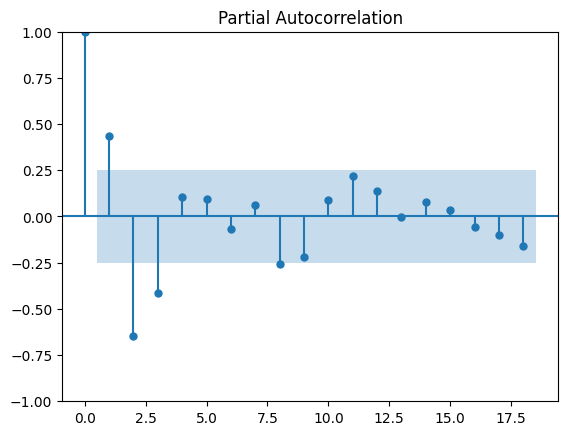

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

_ = plot_pacf(df)

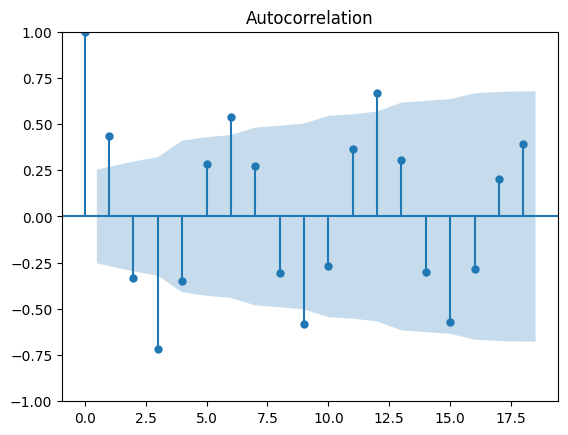

In [65]:
_ = plot_acf(df)

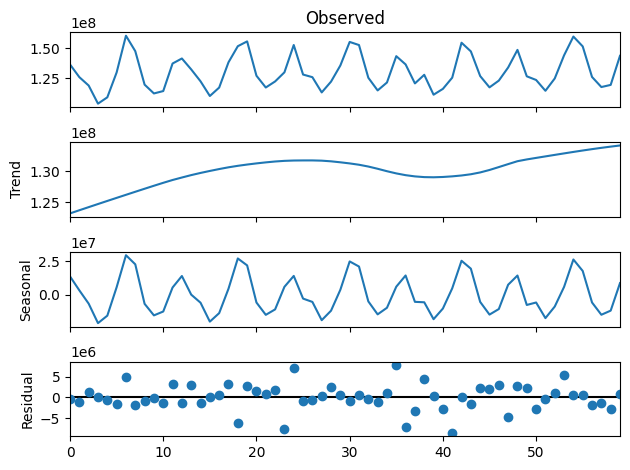

In [70]:
from statsmodels.tsa.seasonal import STL

stl = STL(df.to_numpy(), period=12)
res = stl.fit()
fig = res.plot()